In [3]:
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
np.random.seed(0)

In [24]:
apple = np.loadtxt('../data/apple.csv')

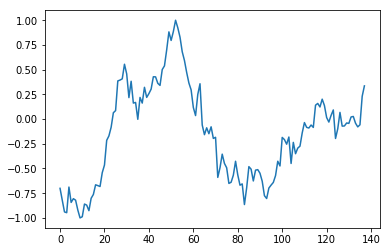

In [26]:
plt.plot(apple)

In [27]:
def transform_series(series, window_size):
    x = list()
    y = list()
    
    l = len(series)
    i = 0
    
    while (i+window_size) < l:
        x.append(series[i:i+window_size])
        y.append(series[i+window_size])
        i += 1
    
    return x, y

In [29]:
window_size = 5
x, y = transform_series(apple, window_size)

In [35]:
apple.shape

(138,)

In [36]:
apple[0:10]

array([-0.70062339, -0.82088484, -0.93938305, -0.9471652 , -0.68785527,
       -0.84325902, -0.80532018, -0.82058073, -0.92023124, -1.        ])

In [38]:
x[0]

array([-0.70062339, -0.82088484, -0.93938305, -0.9471652 , -0.68785527])

In [37]:
y[0]

-0.84325901953619953

In [39]:
x[1]

array([-0.82088484, -0.93938305, -0.9471652 , -0.68785527, -0.84325902])

In [40]:
y[1]

-0.80532017831089364

In [47]:
test_train_split = int(len(y) * .70)
test_train_split

93

In [48]:
x_train = np.array(x[:test_train_split])
y_train = np.array(y[:test_train_split])

x_test = np.array(x[test_train_split:])
y_test = np.array(y[test_train_split:])

In [68]:
x_test.shape

(40, 5)

In [69]:
y_test.shape

(40,)

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop

model = Sequential()
model.add(LSTM(5, input_shape=(window_size, 1)))
model.add(Dense(1))

opt = RMSprop()
model.compile(loss='mean_squared_error', optimizer=opt)

Using TensorFlow backend.


In [55]:
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=0)

In [83]:
x_train = x_train.reshape((x_train.shape[0], window_size, 1))
train_predict = model.predict(x_train)
model.evaluate(x_train, y_train, verbose=0)

0.069632810850938157

In [84]:
x_test = x_test.reshape((x_test.shape[0], window_size, 1))
test_predict = model.predict(x_test)

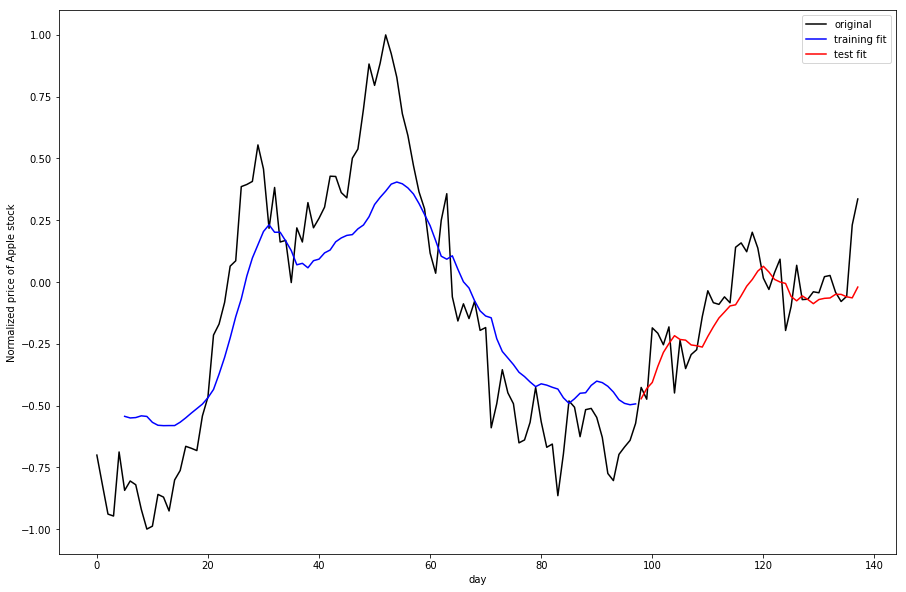

In [89]:
fig = plt.figure(figsize=(15, 10))
plt.plot(apple, c='k')
plt.plot(np.arange(window_size, split_pt, 1), train_predict, c='b')
split_pt = test_train_split + window_size
plt.plot(np.arange(split_pt, split_pt + len(test_predict), 1), test_predict, c='r')
plt.xlabel('day')
plt.ylabel('Normalized price of Apple stock')
plt.legend(['original', 'training fit', 'test fit'])
plt.show()